# Анализ данных удовлетворенности работников
Датасет: [Employees satisfaction analysis](https://www.kaggle.com/datasets/redpen12/employees-satisfaction-analysis/data)
**Описание данных:**
**Satisfaction level**: Уровень удовлетворенности работника  

**Last evaluation**: Последний уровень производительности работника

**Number project**: Количество проектов, над которым в текущий момент работает подчиненный

**Average monthly hours**: Среднее количество часов работы в месяц.

**Time spend company**: Количество лет проработанных в компании

**Work accident**: показывает был ли работник в инциденте

**Promotion last 5 years**: Получал ли работник повышение за последние 5 лет

**Dept**: департамент, в котором работает человек

**Salary**: уровень зарплаты работника.

# Оработка и анализ данных

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("data.csv")
df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,2.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
2,3.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
3,4.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
4,5.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low


Посмотрим на типы данных и их количество

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15787 entries, 0 to 15786
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  float64
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  float64
 4   average_montly_hours   14999 non-null  float64
 5   time_spend_company     14999 non-null  float64
 6   Work_accident          14999 non-null  float64
 7   promotion_last_5years  14999 non-null  float64
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.2+ MB


Уберем данные с пустыми значениями

In [ ]:
df.isna().sum()

,0
Emp ID,788
satisfaction_level,788
last_evaluation,788
number_project,788
average_montly_hours,788
time_spend_company,788
Work_accident,788
promotion_last_5years,788
dept,788
salary,788


In [ ]:
df = df.dropna(axis=0)

In [ ]:
df.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,4329.982679,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


Разедлим категориальные и числовые столбцы

In [ ]:
num_cols=df.select_dtypes(exclude=object)
num_cols=list(num_cols)
num_cols

['Emp ID',
 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years']

In [ ]:
cat_cols=df.select_dtypes(include=object)
cat_cols=list(cat_cols)
cat_cols

['dept', 'salary']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

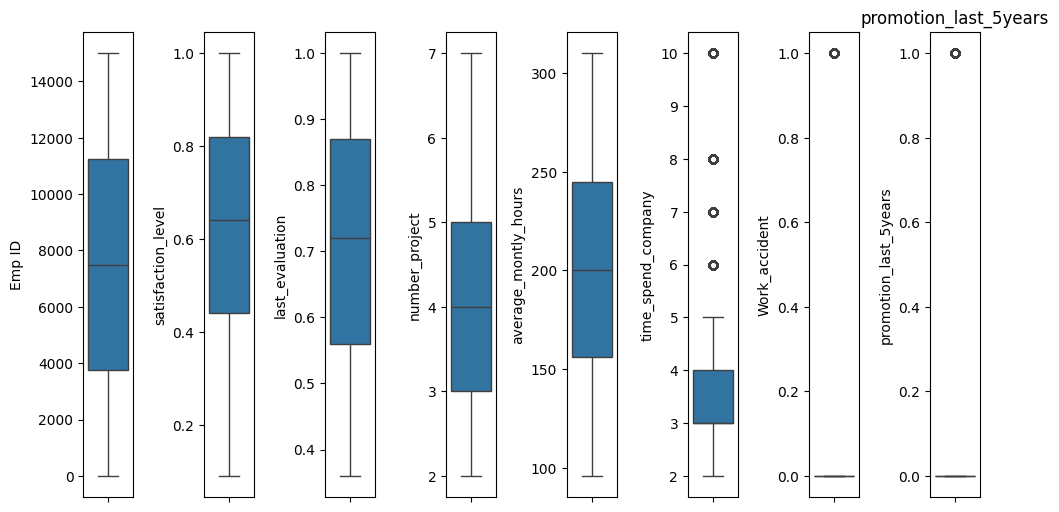

In [ ]:
plt.figure(figsize=(10,5))

for i, column in enumerate(df[num_cols].columns):
    plt.subplot(1,len(df[num_cols].columns),i+1)
    sns.boxplot(y=df[num_cols][column])
plt.tight_layout()
plt.title(column)
plt.show()

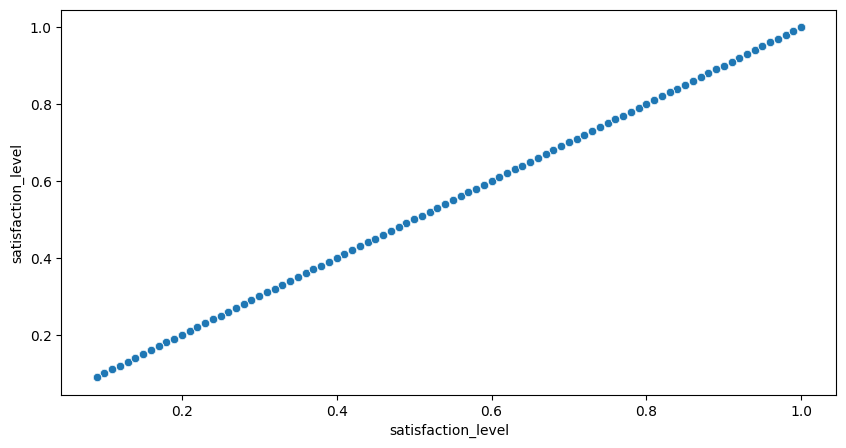

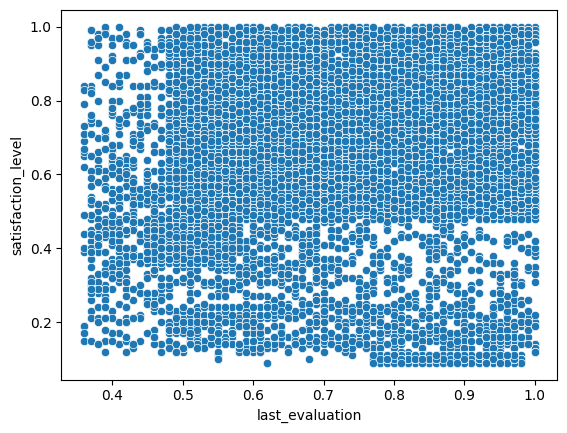

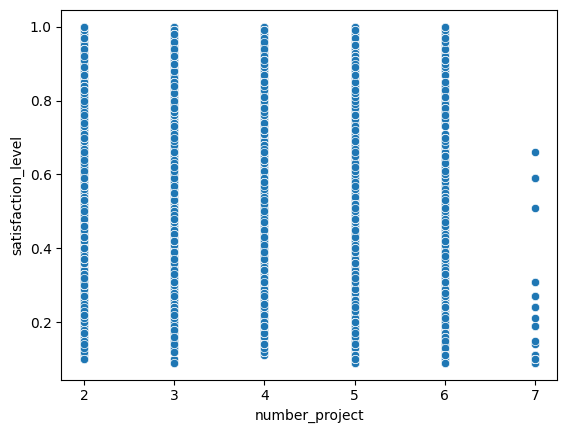

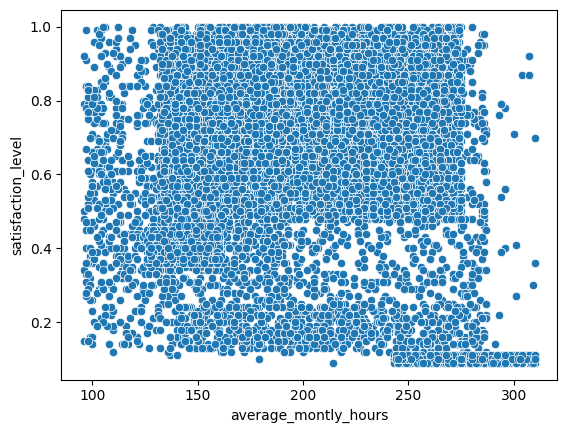

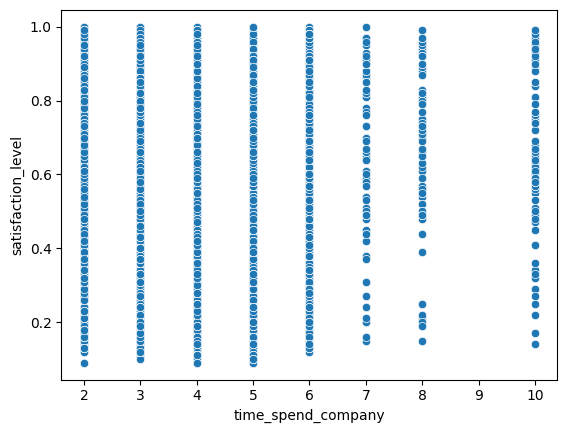

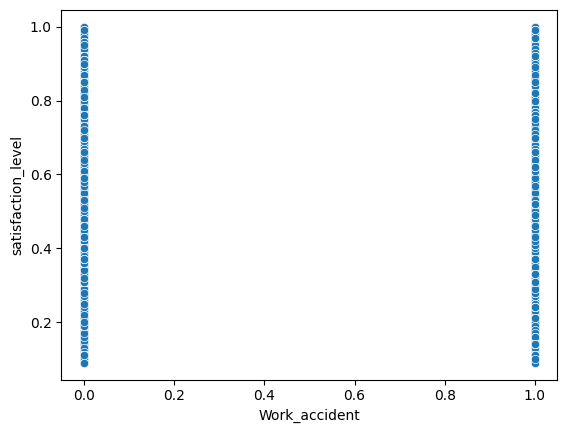

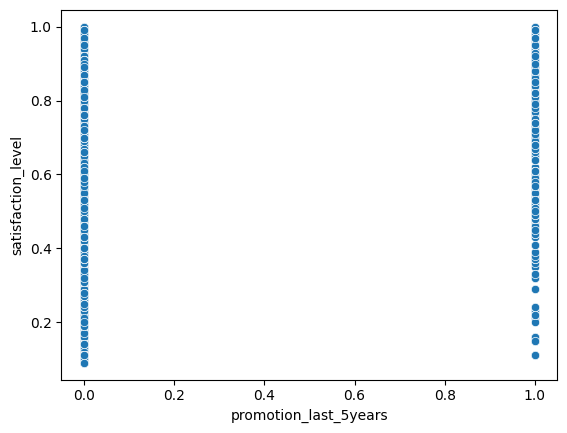

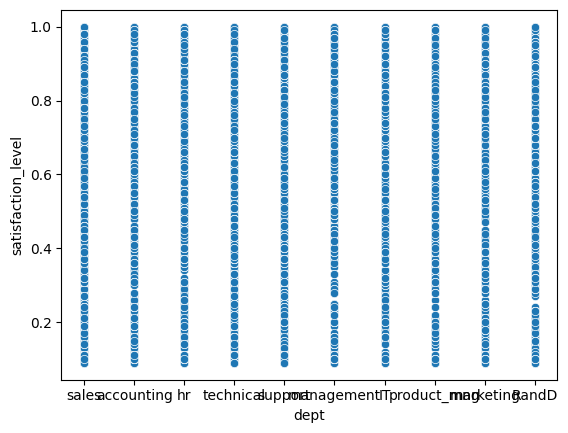

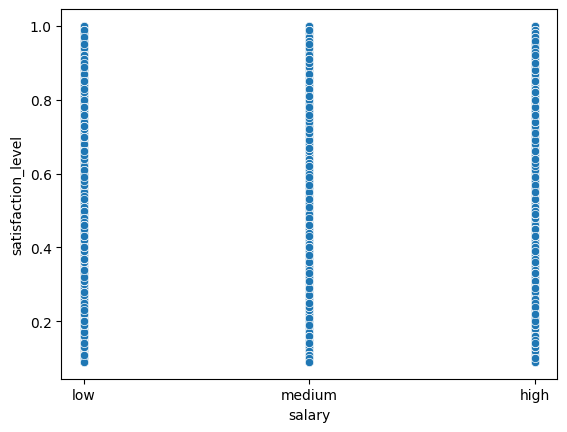

In [ ]:
plt.figure(figsize=(10,5))
for i in ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','dept','salary']:
    sns.scatterplot(x=i,y=df['satisfaction_level'],data=df)
    plt.show()

В итоге можно увидеть, что в данном датасете нет сильных выбросов и можно пропустить основную подготовку датасета.

# Обучение модели

In [ ]:
!pip install catboost -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.9 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor, Pool, cv

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np


import pickle
import json

In [ ]:
y = df.satisfaction_level
X = df.drop(["satisfaction_level", "Emp ID"], axis=1)
cat_features = ["salary", "dept"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
train_pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
test_pool = Pool(data=X_test, label=y_test, cat_features=cat_features)

params = {
    'iterations': 1000,
    'learning_rate': 0.03,
    'eval_metric': 'RMSE',
    'loss_function': 'RMSE',
    'random_seed': 42,
    'verbose': False,
    'early_stopping_rounds': 50
}

cv_results = cv(
    pool=train_pool,
    params=params,
    fold_count=5,
    verbose=100
)

print("Cross-validation results:")
print(cv_results)

model = CatBoostRegressor(**params)

model.fit(train_pool,
          eval_set=test_pool,
          verbose=100,
          early_stopping_rounds=50)


y_pred = model.predict(test_pool)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Test RMSE: {rmse:.2f}")
print(f"Test R2: {r2:.2f}")
print(f"Test MAE: {mae:.2f}")

Training on fold [0/5]
0:	learn: 0.6430345	test: 0.6468735	best: 0.6468735 (0)	total: 15.2ms	remaining: 15.2s
100:	learn: 0.1900274	test: 0.1922521	best: 0.1922521 (100)	total: 1.26s	remaining: 11.2s
200:	learn: 0.1822978	test: 0.1861727	best: 0.1861727 (200)	total: 2.2s	remaining: 8.74s
300:	learn: 0.1796988	test: 0.1849873	best: 0.1849873 (300)	total: 2.86s	remaining: 6.65s
400:	learn: 0.1772597	test: 0.1843655	best: 0.1843516 (395)	total: 3.52s	remaining: 5.26s
500:	learn: 0.1753612	test: 0.1839922	best: 0.1839922 (500)	total: 4.17s	remaining: 4.16s
600:	learn: 0.1736924	test: 0.1838430	best: 0.1838416 (599)	total: 4.78s	remaining: 3.17s
700:	learn: 0.1721250	test: 0.1836314	best: 0.1836223 (696)	total: 5.43s	remaining: 2.32s
800:	learn: 0.1704330	test: 0.1833715	best: 0.1833625 (798)	total: 6.05s	remaining: 1.5s

bestTest = 0.1833034583
bestIteration = 830

Training on fold [1/5]
0:	learn: 0.6425869	test: 0.6488064	best: 0.6488064 (0)	total: 7.71ms	remaining: 7.7s
100:	learn: 0.191

In [ ]:
filename = 'employee_attrition.cb'
pickle.dump(model, open(filename, 'wb'))